In [1]:
import pandas as pd

In [3]:
df = pd.read_csv('DailyDelhiClimateTest.csv')
df.head()

,date,meantemp,humidity,wind_speed,meanpressure
0,2017-01-01,15.913043,85.869565,2.743478,59.000000
1,2017-01-02,18.500000,77.222222,2.894444,1018.277778
2,2017-01-03,17.111111,81.888889,4.016667,1018.333333
3,2017-01-04,18.700000,70.050000,4.545000,1015.700000
4,2017-01-05,18.388889,74.944444,3.300000,1014.333333


In [5]:
df1 = df[['date', 'meantemp']]

In [7]:
df1.head()

,date,meantemp
0,2017-01-01,15.913043
1,2017-01-02,18.500000
2,2017-01-03,17.111111
3,2017-01-04,18.700000
4,2017-01-05,18.388889


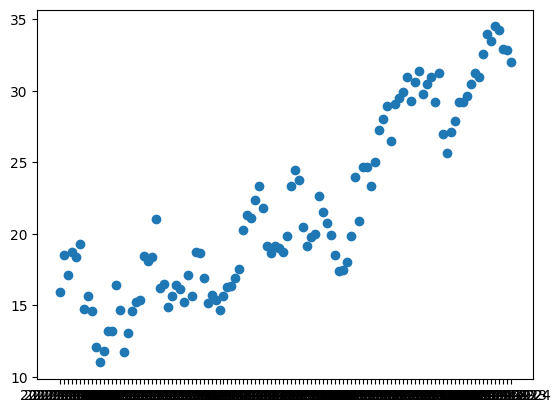

In [8]:
import matplotlib.pyplot as plt
plt.scatter(df1['date'],df1['meantemp'])

### EWMA
- Depend upon alpha value that is same like beta only difference is that for calculate beta we do (1 - alpha).
- If alpha is greater than it tries to capture the pattern as it assigns more weight to recent observation if its low then it assigns more weight to old observations which results in slow response to data points. 

In [26]:
df1['EWMA'] = df1['meantemp'].ewm(alpha=0.9).mean()
df1.head()

C:\Users\DELL\AppData\Local\Temp\ipykernel_7576\222862643.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df1['EWMA'] = df1['meantemp'].ewm(alpha=0.9).mean()


,date,meantemp,EWMA
0,2017-01-01,15.913043,15.913043
1,2017-01-02,18.500000,18.264822
2,2017-01-03,17.111111,17.225443
3,2017-01-04,18.700000,18.552677
4,2017-01-05,18.388889,18.405266


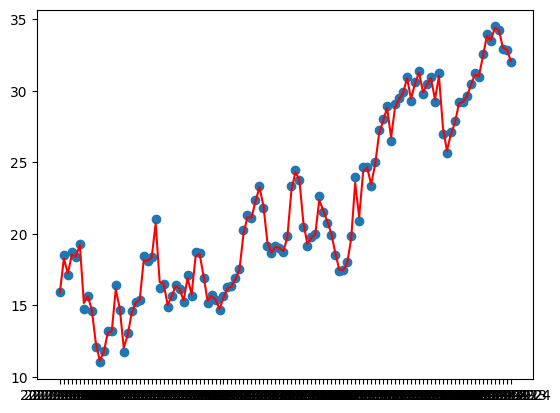

In [27]:
plt.scatter(df1['date'],df1['meantemp'])
plt.plot(df1['date'], df1['EWMA'],c='r')

## Optimizers

In [28]:
import tensorflow as tf
from tensorflow import keras

In [29]:
ushape = pd.read_csv('ushape.csv',names=['x','y','class'])
ushape.head()

,x,y,class
0,0.031595,0.986988,0.0
1,2.115098,-0.046244,1.0
2,0.882490,-0.075756,0.0
3,-0.055144,-0.037332,1.0
4,0.829545,-0.539321,1.0


In [30]:
x = ushape.drop('class',axis=1)
y = ushape['class']

In [32]:
model = keras.Sequential()

model.add(keras.layers.Dense(10,activation='relu',input_shape=(2,)))
model.add(keras.layers.Dense(1,activation='relu'))

model.summary()

Model: "sequential_1"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━┓
┃ Layer (type)                         ┃ Output Shape                ┃         Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━┩
│ dense_2 (Dense)                      │ (None, 10)                  │              30 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dense_3 (Dense)                      │ (None, 1)                   │              11 │
└──────────────────────────────────────┴─────────────────────────────┴─────────────────┘

 Total params: 41 (164.00 B)

 Trainable params: 41 (164.00 B)

 Non-trainable params: 0 (0.00 B)

#### SGD with momentum
- With this dataset it works poorly but basic intuition is to introduce how to use SGD with momentum 

In [49]:
from keras.optimizers import SGD

In [60]:
optimizer = SGD(momentum=0.9)

In [61]:
model.compile(loss='binary_crossentropy',optimizer=optimizer,metrics=['accuracy'])

In [62]:
model.fit(x,y,epochs=100)

Epoch 1/100
4/4 ━━━━━━━━━━━━━━━━━━━━ 1s 4ms/step - accuracy: 0.5000 - loss: 7.9712  
Epoch 2/100
4/4 ━━━━━━━━━━━━━━━━━━━━ 0s 4ms/step - accuracy: 0.4990 - loss: 8.3365 
Epoch 3/100
4/4 ━━━━━━━━━━━━━━━━━━━━ 0s 4ms/step - accuracy: 0.5365 - loss: 7.7387 
Epoch 4/100
4/4 ━━━━━━━━━━━━━━━━━━━━ 0s 5ms/step - accuracy: 0.5083 - loss: 8.1871 
Epoch 5/100
4/4 ━━━━━━━━━━━━━━━━━━━━ 0s 4ms/step - accuracy: 0.4750 - loss: 8.3698 
Epoch 6/100
4/4 ━━━━━━━━━━━━━━━━━━━━ 0s 4ms/step - accuracy: 0.4948 - loss: 7.7055 
Epoch 7/100
4/4 ━━━━━━━━━━━━━━━━━━━━ 0s 4ms/step - accuracy: 0.4906 - loss: 8.1207 
Epoch 8/100
4/4 ━━━━━━━━━━━━━━━━━━━━ 0s 4ms/step - accuracy: 0.4938 - loss: 8.0708 
Epoch 9/100
4/4 ━━━━━━━━━━━━━━━━━━━━ 0s 5ms/step - accuracy: 0.4938 - loss: 8.0708 
Epoch 10/100
4/4 ━━━━━━━━━━━━━━━━━━━━ 0s 4ms/step - accuracy: 0.5208 - loss: 7.9878  
Epoch 11/100
4/4 ━━━━━━━━━━━━━━━━━━━━ 0s 5ms/step - accuracy: 0.5010 - loss: 7.6058 
Epoch 12/100
4/4 ━━━━━━━━━━━━━━━━━━━━ 0s 3ms/step - accuracy: 0.4927 - l

#### NAG (Nesterov Accelerated Gradient)
- Intuition of NAG remember that it is just demo on 

In [64]:
optimizer = SGD(momentum=0.9, nesterov=True)
model.compile(loss='binary_crossentropy', optimizer=optimizer,metrics=['accuracy'])
model.fit(x,y,epochs=100)

Epoch 1/100
4/4 ━━━━━━━━━━━━━━━━━━━━ 1s 5ms/step - accuracy: 0.5000 - loss: 7.9712  
Epoch 2/100
4/4 ━━━━━━━━━━━━━━━━━━━━ 0s 4ms/step - accuracy: 0.4708 - loss: 8.7849 
Epoch 3/100
4/4 ━━━━━━━━━━━━━━━━━━━━ 0s 4ms/step - accuracy: 0.4927 - loss: 8.4362  
Epoch 4/100
4/4 ━━━━━━━━━━━━━━━━━━━━ 0s 4ms/step - accuracy: 0.4938 - loss: 8.0708 
Epoch 5/100
4/4 ━━━━━━━━━━━━━━━━━━━━ 0s 3ms/step - accuracy: 0.5188 - loss: 7.6723 
Epoch 6/100
4/4 ━━━━━━━━━━━━━━━━━━━━ 0s 4ms/step - accuracy: 0.4688 - loss: 8.4694 
Epoch 7/100
4/4 ━━━━━━━━━━━━━━━━━━━━ 0s 4ms/step - accuracy: 0.5073 - loss: 7.5062 
Epoch 8/100
4/4 ━━━━━━━━━━━━━━━━━━━━ 0s 4ms/step - accuracy: 0.4625 - loss: 8.5690 
Epoch 9/100
4/4 ━━━━━━━━━━━━━━━━━━━━ 0s 5ms/step - accuracy: 0.4750 - loss: 8.3698 
Epoch 10/100
4/4 ━━━━━━━━━━━━━━━━━━━━ 0s 4ms/step - accuracy: 0.4771 - loss: 7.6391 
Epoch 11/100
4/4 ━━━━━━━━━━━━━━━━━━━━ 0s 4ms/step - accuracy: 0.5240 - loss: 6.8918 
Epoch 12/100
4/4 ━━━━━━━━━━━━━━━━━━━━ 0s 4ms/step - accuracy: 0.5031 - l